In [1]:
import numpy as np
import pandas as pd
from utils.utils import PROJECT_DATA_DIR
import os
from __future__ import print_function
import mxnet as mx
from mxnet import autograd, gluon
import mxnet.ndarray as nd
from time import time

import tarfile
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

# Note we use gpu, how to change it in runtime?
ctx = mx.gpu()

C:\Users\gilbe\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Data 

In [2]:
karm  = pd.read_csv(os.path.join(PROJECT_DATA_DIR, 'all_training_400_karm.csv'), sep='\s+', header=None)

In [3]:
karm.head()

,0,1,2,3,4,5,6,7,8,9,...,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200
0,0,3,-17,8,8,-9,4,-1,-29,8,...,9,7,-5,8,-3,-18,8,7,-15,15
1,-11,18,-63,-47,-25,42,32,-37,73,3,...,1,21,-2,-7,7,1,-3,15,-21,20
2,-4,14,-6,-7,-1,-10,-4,22,17,-7,...,-5,3,-7,-7,26,14,-12,-10,-10,-1
3,-5,-8,1,-5,6,1,-3,-12,-8,2,...,-5,15,-1,-2,1,16,-5,12,4,-1
4,-8,-25,-35,-8,-14,-31,-10,-28,-15,-2,...,-1,-14,-38,-8,-35,-21,-5,-12,-26,-1


In [4]:
print(karm.shape)
print('labels:', karm[karm.columns[-1]].unique())

(930070, 1201)
labels: [15 20 -1 16 23 21 14 17 22 10 11 25 24 13 18 26 12]


In [5]:
data = pd.read_csv(os.path.join(PROJECT_DATA_DIR, 'all_training_200_4.csv'), sep='\s+', header=None)

In [6]:
df = pd.read_csv(os.path.join(PROJECT_DATA_DIR, 'all_training_100.csv'),sep='\s+', header=None)

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,-7,15,-16,-17,7,-17,15,20,-4,3,...,-26,0,-69,-51,32,4,-25,-36,-21,8
1,30,2,-131,16,6,-101,80,-4,-88,91,...,40,1,-104,37,-38,-82,37,-35,-79,9
2,-460,-176,3796,74,423,337,-1302,188,-2973,-353,...,246,-85,-1006,235,-107,-1073,232,29,-970,9
3,-249,-935,8137,2178,-306,-3209,1889,-786,-5865,-1765,...,803,1102,4589,1814,71,-7278,-930,-1075,-2839,3
4,-11,-20,-34,-5,-14,-47,19,-36,-53,-57,...,-11,14,4,-13,24,-15,-33,39,28,8


In [8]:
print(df.shape)
print('labels:', df[df.columns[-1]].unique())


(205004, 301)
labels: [ 8  9  3  2  7  5 -1  4  6  1  0]


In [9]:
print(data[data.columns[-1]].unique())
data.head()

[ 1  8  9  4  7 -1  5  3  2  6  0]


,0,1,2,3,4,5,6,7,8,9,...,591,592,593,594,595,596,597,598,599,600
0,98,-10,-66,201,14,-441,-17,133,-476,-165,...,-117,22,105,-133,94,184,-107,12,-26,1
1,-16,22,6,-28,-4,-32,-24,-44,-56,-20,...,-21,-46,1,-2,9,-37,-23,13,-27,8
2,38,-12,-101,59,7,-106,41,-28,-103,77,...,36,-49,-451,10,165,-806,-141,170,-431,9
3,-3,7,98,-47,-41,143,-22,-13,173,1,...,4187,7654,-23864,216,5826,1017,-5903,-564,1969,4
4,35,19,108,-16,34,86,-4,-4,79,18,...,70,-50,190,-30,-35,100,52,-34,152,7


In [10]:
data.shape

(199404, 601)

In [11]:
df1 = pd.read_csv(os.path.join(PROJECT_DATA_DIR, 'all_test_2000_1.csv'),sep='\s+', header=None)

In [12]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,5991,5992,5993,5994,5995,5996,5997,5998,5999,6000
0,44,-11,-22,56,-51,-52,-20,38,-85,40,...,33,-39,99,2,-59,152,30,-29,-7,6
1,4,13,115,50,1,99,98,-11,91,66,...,25,9,48,-32,-6,-14,8,-9,26,0
2,17,11,-6,-3,2,-33,-66,22,-10,-22,...,1,-18,19,1,-11,1,-32,15,-1,8
3,758,-248,-1770,96,94,-2131,-33,12,-2105,603,...,452,-1391,2261,804,-1310,1388,-82,-281,-755,2
4,11,33,56,-53,-6,62,-9,20,51,-54,...,-93,180,-584,-218,44,-397,-183,-99,-504,4


In [13]:
sensor_train = pd.read_csv(os.path.join(PROJECT_DATA_DIR, 
                                        'all_training_400_minisensor_1.csv'), 
                           sep='\s+', header=None)

sensor_test = pd.read_csv(os.path.join(PROJECT_DATA_DIR, 
                                       'all_test_400_minisensor.csv'),
                          sep='\s+', header=None)

In [14]:
sensor_train.head()

,0,1,2,3,4,5,6,7,8,9,...,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200
0,-3,3,4,-3,3,4,1,-3,2,0,...,0,0,0,3,0,-4,-2,0,-5,8
1,3,0,0,1,0,0,0,2,0,0,...,-1,0,-7,3,-1,-7,7,-1,-5,7
2,1,-3,7,0,1,4,-3,4,0,-2,...,-4,1,8,-2,1,12,0,4,11,4
3,4,1,-1,3,4,-8,3,4,-1,3,...,0,4,-5,-1,3,6,3,4,7,6
4,0,-4,0,5,0,0,5,0,-5,0,...,0,-4,-4,3,3,0,4,3,1,8


In [15]:
sensor_test.head()

,0,1,2,3,4,5,6,7,8,9,...,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200
0,1,-1,-1,0,2,-1,-2,2,1,-2,...,-2,-3,0,0,0,1,0,2,0,8
1,3,6,-13,3,6,-8,3,6,-2,-1,...,-1,7,44,14,7,51,23,11,59,6
2,-1,2,-1,2,0,-1,-4,-3,0,-4,...,-1,0,-1,-1,0,-8,-3,0,-3,5
3,48,18,-57,48,-3,-148,37,-33,-241,29,...,4,0,-17,9,0,-17,6,0,-21,8
4,-2,-2,0,0,-3,1,-3,0,0,3,...,0,0,4,0,-3,6,3,-3,4,8


In [16]:
sensor_train[sensor_train.columns[-1]].unique()

array([ 8,  7,  4,  6, -1,  1,  5,  2,  9,  3,  0], dtype=int64)

In [17]:
sensor_train[sensor_train.columns[-1]].unique()

array([ 8,  7,  4,  6, -1,  1,  5,  2,  9,  3,  0], dtype=int64)

In [18]:
sensor_test[sensor_test.columns[-1]].unique()

array([ 8,  6,  5,  4,  0, -1,  2,  1,  9,  7,  3], dtype=int64)

In [19]:
from sklearn.preprocessing import (MinMaxScaler,
                                   StandardScaler,
                                   Imputer,
                                   QuantileTransformer)

In [20]:
ytrain = sensor_train[sensor_train.columns[-1]]
#ytrain.head()
xtrain = sensor_train.drop(sensor_train.columns[-1], axis=1) 

In [21]:
xtrain.head()

,0,1,2,3,4,5,6,7,8,9,...,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199
0,-3,3,4,-3,3,4,1,-3,2,0,...,-1,0,0,0,3,0,-4,-2,0,-5
1,3,0,0,1,0,0,0,2,0,0,...,-8,-1,0,-7,3,-1,-7,7,-1,-5
2,1,-3,7,0,1,4,-3,4,0,-2,...,4,-4,1,8,-2,1,12,0,4,11
3,4,1,-1,3,4,-8,3,4,-1,3,...,-1,0,4,-5,-1,3,6,3,4,7
4,0,-4,0,5,0,0,5,0,-5,0,...,4,0,-4,-4,3,3,0,4,3,1


In [22]:
ytest = sensor_test[sensor_test.columns[-1]]
xtest = sensor_test.drop(sensor_test.columns[-1], axis=1) 

In [23]:
ytrain_sc = ytrain.map(lambda x: 1 if (x == 2 or x == 3) else 0)
ytest_sc = ytest.map(lambda x: 1 if (x == 2 or x == 3) else 0)

In [24]:
print(ytrain_sc.unique())
ytrain_sc.head()


[0 1]


0    0
1    0
2    0
3    0
4    0
Name: 1200, dtype: int64

## Preprocessing

In [25]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91104 entries, 0 to 91103
Columns: 1200 entries, 0 to 1199
dtypes: int64(1200)
memory usage: 834.1 MB


In [26]:
print(xtrain.shape)
xtrain.describe()

(91104, 1200)


,0,1,2,3,4,5,6,7,8,9,...,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199
count,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,...,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000
mean,-0.148303,-0.084958,1.254369,-0.187906,-0.006333,1.236104,-0.169652,-0.041293,1.176655,-0.134264,...,1.176524,-0.145855,-0.018858,1.112937,-0.092213,-0.039427,1.077790,-0.040437,-0.056682,1.104759
std,27.286271,27.909568,46.855641,27.765273,28.559648,46.999119,28.626503,28.982204,46.765926,28.193874,...,46.367091,27.301695,27.251507,46.007632,27.150623,27.219451,46.120196,26.833842,26.793117,45.991891
min,-1914.000000,-1998.000000,-1160.000000,-1914.000000,-1998.000000,-1160.000000,-2305.000000,-1998.000000,-1160.000000,-2305.000000,...,-1160.000000,-1914.000000,-1998.000000,-1160.000000,-1914.000000,-1998.000000,-1160.000000,-2305.000000,-1998.000000,-950.000000
25%,-2.000000,-2.000000,-4.000000,-2.000000,-2.000000,-4.000000,-2.000000,-2.000000,-4.000000,-2.000000,...,-4.000000,-2.000000,-2.000000,-4.000000,-2.000000,-2.000000,-4.000000,-2.000000,-2.000000,-4.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,2.000000,5.000000,3.000000,2.000000,5.000000,3.000000,2.000000,5.000000,3.000000,...,5.000000,3.000000,2.000000,5.000000,3.000000,2.000000,5.000000,3.000000,2.000000,5.000000
max,542.000000,2001.000000,1169.000000,438.000000,2054.000000,1169.000000,542.000000,2054.000000,1169.000000,542.000000,...,1169.000000,542.000000,2001.000000,1169.000000,542.000000,2054.000000,1169.000000,542.000000,2054.000000,1169.000000


In [27]:
import matplotlib.pyplot as plt

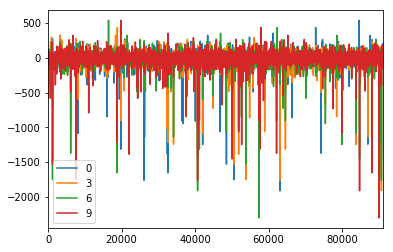

In [28]:
xtrain[xtrain.columns[0:10:3]].plot()
plt.show()

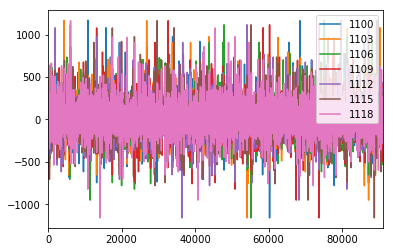

In [29]:
xtrain[xtrain.columns[1100:1120:3]].plot()
plt.show()

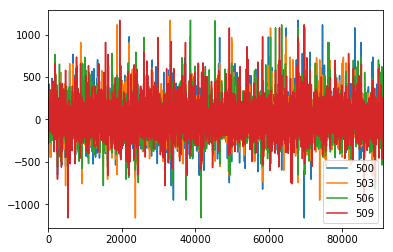

In [30]:
xtrain[xtrain.columns[500:510:3]].plot()
plt.show()

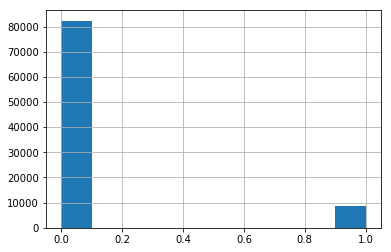

In [31]:
ytrain_sc.hist()
plt.show()

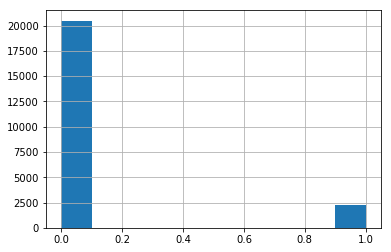

In [32]:
ytest_sc.hist()
plt.show()

## Scaling and transforming data

In [33]:
scaler = StandardScaler()#QuantileTransformer(output_distribution='normal')
xtrain_sc = scaler.fit_transform(xtrain)
xtest_sc = scaler.transform(xtest)

In [34]:
print(ytrain_sc.shape)
print(xtrain_sc.shape)
type(xtrain_sc)


(91104,)
(91104, 1200)


numpy.ndarray

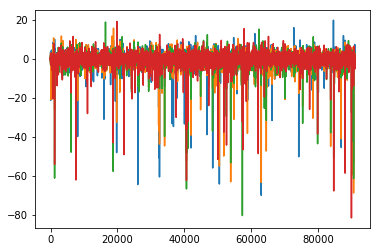

In [35]:
plt.plot(xtrain_sc[:,0:10:3])
plt.show()


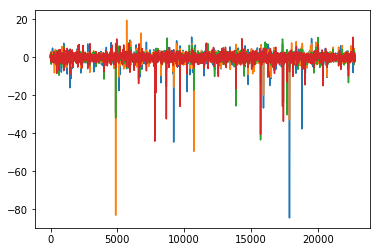

In [36]:
plt.plot(xtest_sc[:,0:10:3])
plt.show()

# Transform data to mxnet tensors
TODO:
* make the transformations with mxnet tensors
* use compose with mxnet's DataLoader


In [37]:
xtrain_mx = mx.nd.array(xtrain_sc, dtype=np.float32)
ytrain_mx = mx.nd.array(ytrain_sc, dtype=np.float32)
print('Shape of mxnet tensor xtrain:', xtrain_mx.shape)
print('Shape of mxnet ytrain:', ytrain_mx.shape)


xtest_mx = mx.nd.array(xtest_sc, dtype=np.float32)
ytest_mx = mx.nd.array(ytest_sc, dtype=np.float32)
print('Shape of mxnet tensor xtest:', xtest_mx.shape)
print('Shape of mxnet ytest:', ytest_mx.shape)

Shape of mxnet tensor xtrain: (91104, 1200)
Shape of mxnet ytrain: (91104,)
Shape of mxnet tensor xtest: (22776, 1200)
Shape of mxnet ytest: (22776,)


## Load data in MXNet with DataLoader

In [38]:
batch_size = 2**9
train_data = gluon.data.DataLoader(
    gluon.data.ArrayDataset(xtrain_mx, ytrain_mx), 
    batch_size=batch_size, 
    shuffle=True)
test_data = gluon.data.DataLoader(
    gluon.data.ArrayDataset(xtest_mx, ytest_mx), 
    batch_size=batch_size, 
    shuffle=False)

# MXNet model
* Note no activation at the output as this will computed by the loss

In [39]:
hidden_units = [1200, 500, 75]
num_outputs = 1

net = gluon.nn.Sequential()
with net.name_scope():
    net.add(gluon.nn.Dense(hidden_units[0], activation='relu'))
    net.add(gluon.nn.Dropout(0.4))
    net.add(gluon.nn.Dense(hidden_units[1], activation='relu'))
    net.add(gluon.nn.Dropout(0.4))
    net.add(gluon.nn.Dense(hidden_units[2], activation='relu'))
    net.add(gluon.nn.Dropout(0.4))
    net.add(gluon.nn.Dense(num_outputs))

In [40]:
net.collect_params().initialize(mx.init.Xavier(magnitude=2.24), ctx=ctx)

## Evaluation

In [41]:
def evaluate_accuracy(data_iterator, net, loss_fun):
    acc = mx.metric.Accuracy()
    #num_correct = 0.
    loss_avg = 0.
    for i, (data, label) in enumerate(data_iterator):
        data = data.as_in_context(ctx)
        label = label.as_in_context(ctx)
        output = net(data)
        loss = loss_fun(output, label)
        predictions = nd.argmax(output, axis=1)#output#(nd.sign(output) + 1)/2
        #num_correct += nd.sum(predictions == label)
        acc.update(preds=predictions, labels=label)
        loss_avg = loss_avg * i/(i + 1) + nd.mean(loss).asscalar()/(i + 1)
    return acc.get()[1], loss_avg
        

def plot_learningcurves(loss_tr, loss_ts, acc_tr, acc_ts):
    xs = list(range(len(loss_tr)))
    
    f = plt.figure(figsize=(12, 6))
    fg1 = f.add_subplot(121)
    fg2 = f.add_subplot(122)
    
    fg1.set_xlabel('epoch', fontsize=14)
    fg1.set_title('Comparing loss functions')
    fg1.plot(xs, loss_tr)
    fg1.plot(xs, loss_ts)
    fg1.grid(True, which="both")
    
    fg1.legend(['training loss', 'testing loss'], fontsize=14)
    
    fg2.set_title('Comparing accuracy')
    fg1.set_xlabel('epoch', fontsize=14)
    fg2.plot(xs, acc_tr)
    fg2.plot(xs, acc_ts)
    fg2.grid(True, which="both")
    fg2.legend(['training accuracy', 'testing accuracy'], fontsize=14)
    plt.show()
        

## Training

In [42]:
loss = gluon.loss.SigmoidBinaryCrossEntropyLoss()
trainer = gluon.Trainer(net.collect_params(), 
                        'Adam', 
                        {'learning_rate': 0.001})
epochs = 20
moving_loss = 0.
niter = 0

loss_seq_train = []
loss_seq_test = []
acc_seq_train = []
acc_seq_test = []

for e in range(epochs):
    start = time()
    for i, (data, label) in enumerate(train_data):
        data = data.as_in_context(ctx)
        label = label.as_in_context(ctx)
        with autograd.record():
            output = net(data)
            cross_entropy = loss(output, label)
        cross_entropy.backward()
        trainer.step(data.shape[0])
        niter += 1
        moving_loss = 0.99 * moving_loss + 0.01 * nd.mean(cross_entropy).asscalar()
        est_loss = moving_loss/(1 - 0.99**niter)
    train_accuracy, train_loss = evaluate_accuracy(train_data, net, loss)
    test_accuracy, test_loss = evaluate_accuracy(test_data, net, loss)
    loss_seq_train.append(train_loss)
    loss_seq_test.append(test_loss)
    acc_seq_train.append(train_accuracy)
    acc_seq_test.append(test_accuracy)
    print("Completed epoch {} | time per epoch: {} sec| Train Loss: {} | Test Loss {}| Train acc {}| Test acc {}" .format(
        e + 1,
        time() - start,
        train_loss,
        test_loss,
        train_accuracy,
        test_accuracy))

#plot_learningcurves(loss_seq_train, loss_seq_test, acc_seq_train, acc_seq_test)

Completed epoch 1 | time per epoch: 5.931267499923706 sec| Train Loss: 0.04793540919932086 | Test Loss 0.05943979562984575| Train acc 0.9033961187214612| Test acc 0.8990604144713734
Completed epoch 2 | time per epoch: 5.627462387084961 sec| Train Loss: 0.02761536262657365 | Test Loss 0.03993241128822169| Train acc 0.9033961187214612| Test acc 0.8990604144713734
Completed epoch 3 | time per epoch: 6.0141987800598145 sec| Train Loss: 0.019934807940689695 | Test Loss 0.03287959256105951| Train acc 0.9033961187214612| Test acc 0.8990604144713734
Completed epoch 4 | time per epoch: 6.080876588821411 sec| Train Loss: 0.01468188829688627 | Test Loss 0.028343562347193558| Train acc 0.9033961187214612| Test acc 0.8990604144713734
Completed epoch 5 | time per epoch: 5.764662742614746 sec| Train Loss: 0.010535258290964822 | Test Loss 0.026558421697053643| Train acc 0.9033961187214612| Test acc 0.8990604144713734
Completed epoch 6 | time per epoch: 5.764235973358154 sec| Train Loss: 0.004783796720

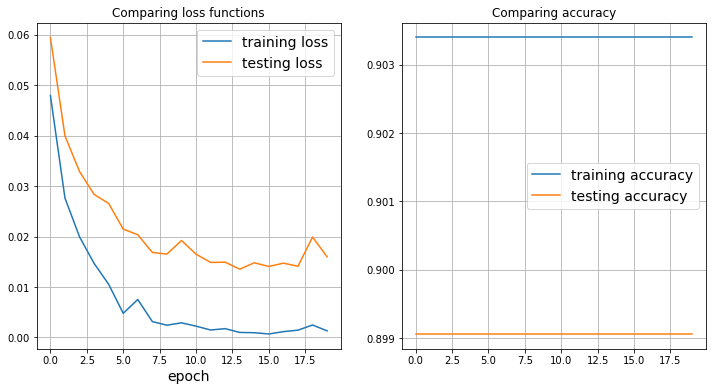

In [43]:
plot_learningcurves(loss_seq_train, 
                    loss_seq_test, 
                    acc_seq_train, 
                    acc_seq_test)

In [44]:
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, BatchNormalization
from keras import optimizers
from sklearn.metrics import f1_score

Using TensorFlow backend.


In [45]:
#del model
model = Sequential()
#model.add(BatchNormalization(input_dim=1200))
model.add(Dense(units=1200, activation='relu', input_dim=1200), )
model.add(Dropout(0.4))
model.add(Dense(units=500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=75, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=1, activation='sigmoid'))


In [46]:
lr = 0.001
optim = optimizers.Adam(lr=lr,
                        beta_1=0.9,
                        beta_2=0.999,
                        decay=1e-6)
model.compile(loss='binary_crossentropy',
                        optimizer=optim,
                        metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [47]:
history = model.fit(xtrain_sc,
                    ytrain_sc,
                    epochs=20,
                    batch_size=2**9, 
                    validation_data=(xtest_sc, ytest_sc))

Train on 91104 samples, validate on 22776 samples
Epoch 1/20
91104/91104 [==============================] - 8s - loss: 0.1857 - acc: 0.9455 - val_loss: 0.0722 - val_acc: 0.9693
Epoch 2/20
91104/91104 [==============================] - 5s - loss: 0.0593 - acc: 0.9759 - val_loss: 0.0405 - val_acc: 0.9823
Epoch 3/20
91104/91104 [==============================] - 5s - loss: 0.0388 - acc: 0.9839 - val_loss: 0.0375 - val_acc: 0.9840
Epoch 4/20
91104/91104 [==============================] - 5s - loss: 0.0318 - acc: 0.9879 - val_loss: 0.0279 - val_acc: 0.9883
Epoch 5/20
91104/91104 [==============================] - 5s - loss: 0.0249 - acc: 0.9911 - val_loss: 0.0224 - val_acc: 0.9910
Epoch 6/20
91104/91104 [==============================] - 5s - loss: 0.0233 - acc: 0.9919 - val_loss: 0.0212 - val_acc: 0.9921
Epoch 7/20
91104/91104 [==============================] - 5s - loss: 0.0190 - acc: 0.9937 - val_loss: 0.0253 - val_acc: 0.9899
Epoch 8/20
91104/91104 [==============================] - 5s 

In [48]:
pred_train = model.predict_classes(xtrain_sc)
pred_test = model.predict_classes(xtest_sc)
print(pred_test)
print('')
print('unique values train data set', np.unique(pred_train))
print('unique values test data set:', np.unique(pred_test))
print('')
print('training score:', f1_score(ytrain_sc, pred_train))
print('test score:', f1_score(ytest_sc, pred_test))

22048/22776 [============================>.] - ETA: 0s[[0]
 [0]
 [0]
 ...
 [0]
 [1]
 [0]]

unique values train data set [0 1]
unique values test data set: [0 1]

training score: 0.9990910123849562
test score: 0.9790794979079498


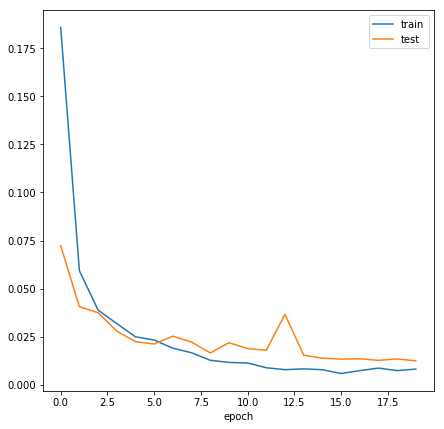

In [49]:
plt.figure(figsize=(7,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
#plt.legeng()
plt.show()

In [50]:
from sklearn.metrics import confusion_matrix